# DSCI-508 Determining Trade Union Status - A Final Project
### Matt Snyder

In [9]:
import pandas as pd
import os  
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

## Load Data

In [3]:
df = pd.read_csv('Matthew-TRAIN.csv')
df.head()

,TrueID,SetID,gender,Management,USAcitizen,Married,MonthsInUnion,ContinuingEd,StateOfResidence,Connectivity,...,FeatureC,FeatureD,FeatureE,FeatureF,DuesFrequency,PaperlessBilling,PaymentMethod,MonthlyDues,TotalDues,LeftUnion
0,2453,Kelby1-17547,Male,0,Yes,Yes,28,Yes,IL,Fiber optic,...,No,No,Yes,Yes,One year,No,Electronic check,106.10,2847.4,Yes
1,4992,Kelby2-15008,Female,0,Yes,Yes,6,Yes,MO,DSL,...,No,No,No,No,Month-to-month,No,Mailed check,45.50,285.2,No
2,4909,Kelby3-15091,Female,0,Yes,No,71,Yes,IL,No,...,Maryville,Maryville,Maryville,Maryville,Two year,No,Mailed check,23.85,1672.1,No
3,6612,Kelby4-13388,Male,0,No,No,5,Yes,MO,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Mailed check,80.10,398.55,No
4,1952,Kelby5-18048,Male,0,Yes,No,65,Yes,IL,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),91.85,5940.85,Yes


## Cleanse and Normalize

### Cleanse
Make a histogram of every feature, not including the ID fields, to check for anomolous entries, such as misspellings, or the same thing represented two ways.  I did not find anything that needed cleansing

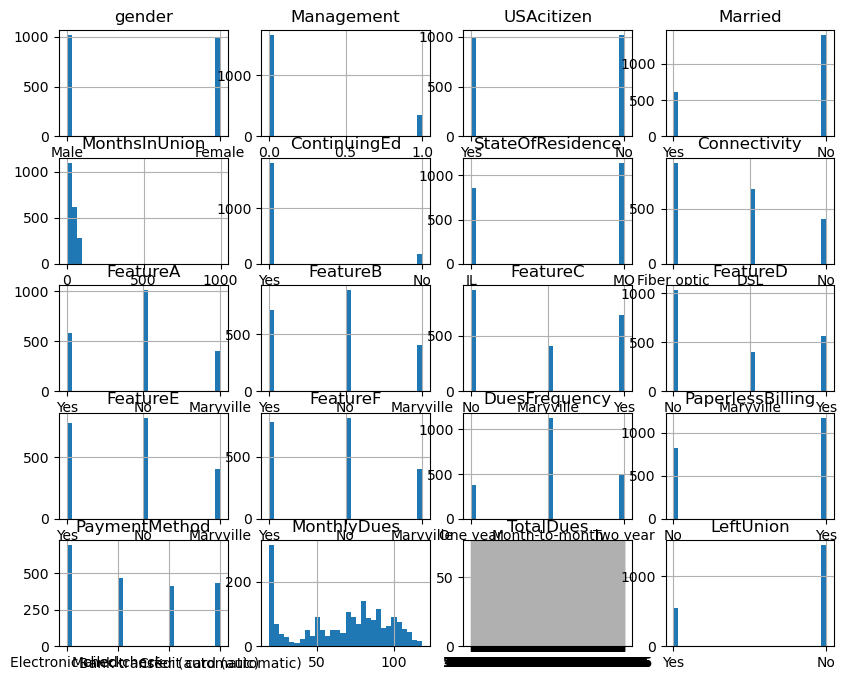

In [13]:
plt.figure(figsize=[10,8])
for i in range(2, len(df.columns)):
    plt.subplot(5,4,i-1)
    df.iloc[:, i].hist(bins=30)
    plt.title(df.columns[i])
plt.show()

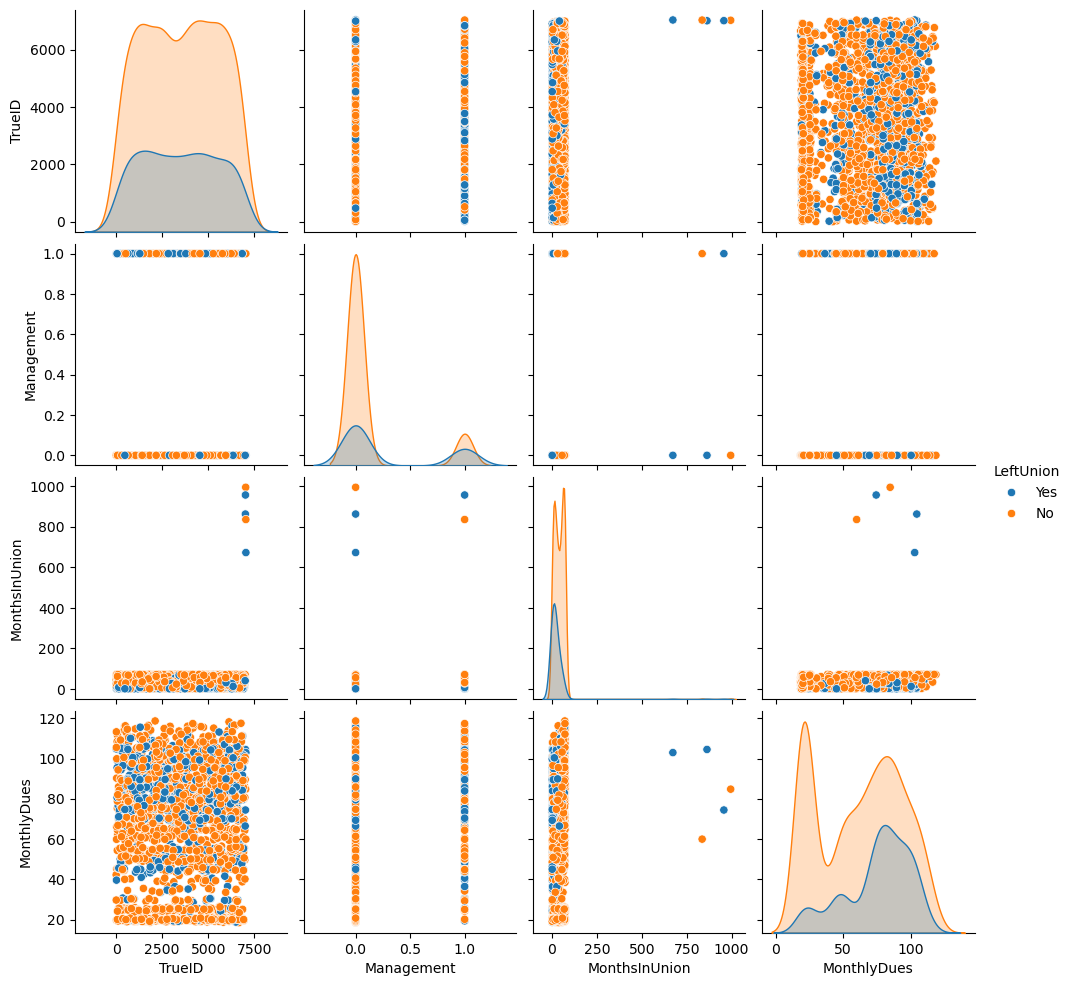

In [4]:
sns.pairplot(df, hue="LeftUnion")

### Normalize
First look for strong correlation between the features, which would allow me to quickly reduce dimensions.  I used the pairplot function of Seaborn.  I am also looking for predictors of the target.

Things that I observed:
* Months in Union is heavily clustered under 100, with only a handful of outliers. It appears that 60% of the outliers left the union, which differs from the overall tendency of only 27%, so there might be some predictive value.  Or, I could just ignore the outliers, by truncating those above 100 to 100.  I think I will truncate, and then normalize to numbers between 0 and 1 by dividing by 100.
* For each feature, the distribution is similar between left the union and did not.
* No apparent correlation between any two features
* Monthly dues are not uniformly distributed, and not normally either.  There are two peaks, looks like around 25 and 80.  I could convert all these numbers to 0 or 1, representing dues closer to 25 or dues closer to 80.  I think instead, I will normalize MonthlyDues to be in the range 0 to 1, by dividing by the max, which looks like 120.

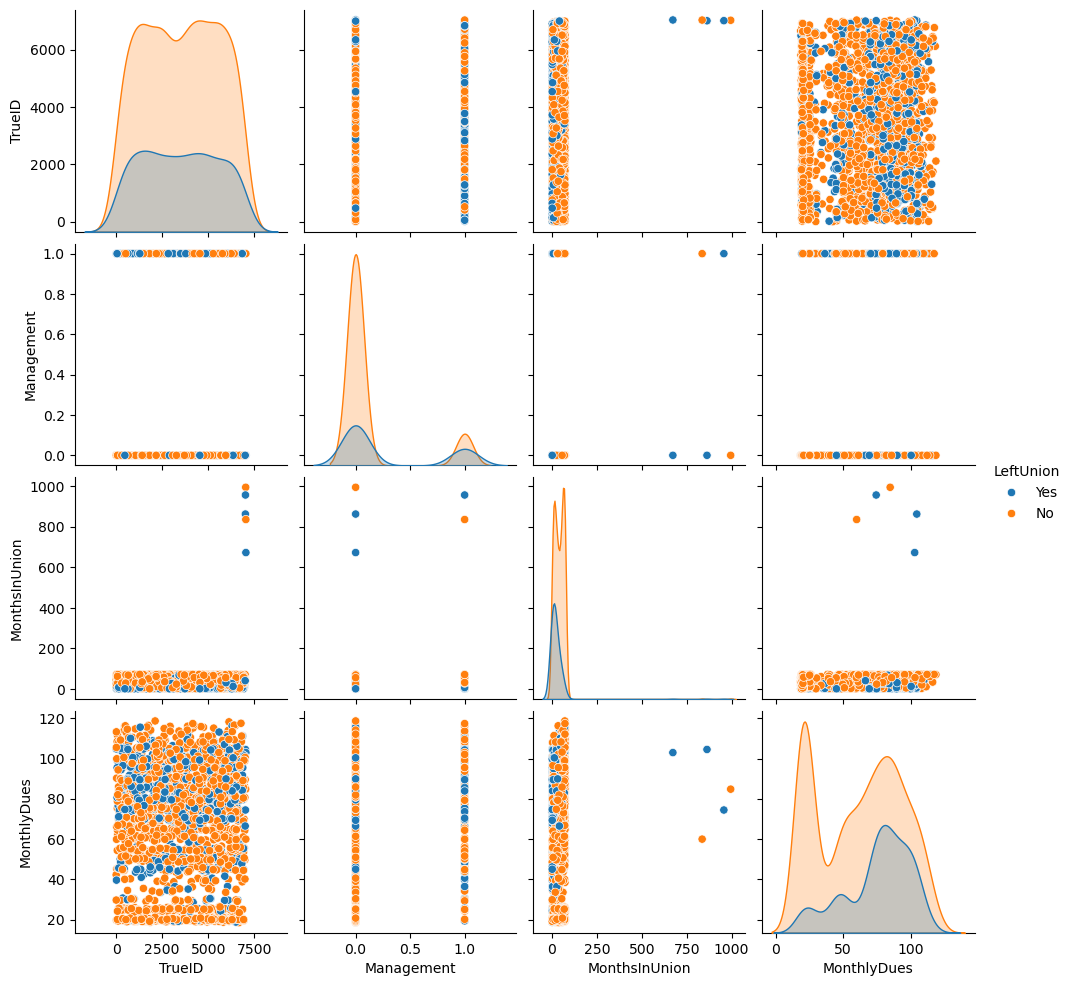

In [4]:
sns.pairplot(df, hue="LeftUnion")

Percentage distribution of LeftUnion

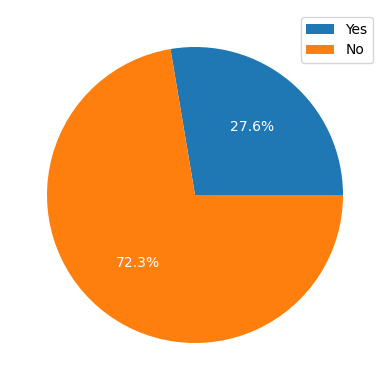

In [31]:
dist = df["LeftUnion"].value_counts().to_dict()
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot()
dist_sorted = sorted(dist.items(), reverse=True) # sort dictionary to get colors of No and Yes to match above charts
dist = dict(dist_sorted)
ax.pie(dist.values(), labels = dist.keys(), autopct = '%1.1f%%', textprops = {'fontsize': 10, 'color' : "white"})
plt.tight_layout()
plt.legend()
plt.show()